In [4]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)


from markov_pyactup import *
from statsmodels.formula.api import logit, glm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


main_dir = os.path.dirname(os.path.realpath('../__file__'))

Error trying to connect to ACT-R at 127.0.0.1 : 2650 with exception (<class 'ConnectionRefusedError'>, ConnectionRefusedError(61, 'Connection refused'), <traceback object at 0x7ff5771127c0>)
ACT-R connection NOT established, but no exception detected or already handled.
Could not start ACT-R connection.


In [5]:
# model_name='markov-rlhybrid' rlmf
model_name='markov-ibl'
r1, r0 = 1,-1
params = {'REWARD': {'B1': (r1, r0), 'B2': (r1, r0), 'C1': (r1, r0), 'C2': (r1, r0)}}


m = MarkovIBL(verbose=1, model=model_name)
m.update_parameters(**params, decay=.1, p_parameter=.5)
m.run_experiment(n=5) 

################## SETUP MODEL markov-ibl ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, -1), 'B2': (1, -1), 'C1': (1, -1), 'C2': (1, -1)}, 'alpha1': 0.2, 'alpha2': 0.2, 'beta1': 5, 'beta2': 5, 'lambda_parameter': 0.2, 'p_parameter': 0.5, 'w_parameter': 0, 'noise': 0.2, 'decay': 0.1}
<[MARKOV_STATE] 	[R, 0.00]'A2' 	[L, 0.00]'C1' 	R:[1] 	[C][C]
<[MARKOV_STATE] 	[L, 0.00]'A1' 	[R, 0.00]'B2' 	R:[1] 	[C][R]
<[MARKOV_STATE] 	[R, 0.00]'A2' 	[R, 0.00]'C2' 	R:[-1] 	[C][C]
<[MARKOV_STATE] 	[R, 0.00]'A2' 	[L, 0.00]'B1' 	R:[1] 	[R][C]
<[MARKOV_STATE] 	[R, 0.00]'A2' 	[L, 0.00]'C1' 	R:[1] 	[C][C]


In [6]:
# pprint.pprint(m.memory) #dm

In [7]:
# pprint.pprint(m.memory.activation_history) #dm

  0%|          | 0/100 [00:00<?, ?it/s]

################## SETUP MODEL markov-ibl ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, -1), 'B2': (1, -1), 'C1': (1, -1), 'C2': (1, -1)}, 'alpha1': 0.5, 'alpha2': 0.5, 'beta1': 5, 'beta2': 5, 'lambda_parameter': 0.5, 'p_parameter': 0, 'w_parameter': 0, 'noise': 0.2, 'decay': 0.2}


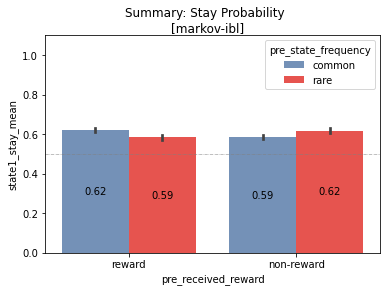

In [8]:
df = MarkovSimulation.run_simulations(model=model_name, e=100, verbose=True, \
                                      **params, \
                                      alpha1=.5, alpha2=.5, \
                                      beta1=5, beta2=5, \
                                      p_parameter=0, lambda_parameter=.5, w_parameter=0,
                                      noise=.2, decay=.2)
Plot.plot_response_switch(df, model_name=model_name, dep_var_suffix="_mean")

## Estimate LL

In [28]:
main_dir = os.path.dirname(os.getcwd())
subject_dir = os.path.join(main_dir, 'data', 'human', 'online_data')


subject_id = '5'

e = MarkovEstimateion()
e.data = e.load_subject_data(subject_dir=subject_dir, subject_id=subject_id)
opt.minimize(e.vLLproc, x0 = [0.5, 0.5], method = "Nelder-Mead")

 final_simplex: (array([[0.20910638, 0.26148776],
       [0.20918667, 0.26149429],
       [0.20918705, 0.26155371]]), array([95.43856951, 95.43856972, 95.43856984]))
           fun: 95.43856951333247
       message: 'Optimization terminated successfully.'
          nfev: 66
           nit: 33
        status: 0
       success: True
             x: array([0.20910638, 0.26148776])

<ipython-input-29-0ef3acd725bd>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + [str(round(x,2)) for x in alphaspace])
<ipython-input-29-0ef3acd725bd>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + [str(round(x, 2)) for x in tempspace])


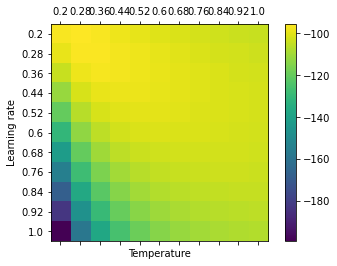

In [29]:
alphaspace = np.linspace(0.2, 1, 11)
tempspace = np.linspace(0.2, 1, 11)
matrix = np.zeros((len(alphaspace), len(tempspace)))
for i, a in enumerate(alphaspace):
    for j, t in enumerate(tempspace):
        matrix[i,j] = MarkovEstimateion.estimate_LL(e.data, a, t)
        
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, interpolation='nearest')
fig.colorbar(cax)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xticklabels([''] + [str(round(x,2)) for x in alphaspace])
ax.set_yticklabels([''] + [str(round(x, 2)) for x in tempspace])
ax.set_ylabel("Learning rate")
ax.set_xlabel("Temperature")
plt.show()

In [31]:
df_fits = pd.read_csv(os.path.join(main_dir, "data/human/analysis_code_and_data/output/online_data/RL/online_fits.txt"), 
                      sep='\t', header=None)
df_fits.columns = ['param'+str(i) for i in range(8)] + ['subject_id']
df_fits[df_fits['subject_id']=='sub'+subject_id]

,param0,param1,param2,param3,param4,param5,param6,param7,subject_id
106,107,0.463308,2.150351,3.537485,2.271229,0.270756,0.806843,182.6808,sub5
